<a href="https://colab.research.google.com/github/kkettip/datasci_6_regression/blob/main/datasci_6_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [2]:
!pip install ucimlrepo

In [4]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context


In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)



{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

**Simple Linear Regression**

In [6]:
#X=Independent Variable
#Y=Dependent Variable
df = pd.DataFrame(heart_disease.data.features)
X = df["age"]
y = df["thalach"]

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [8]:
df.sample(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
257,76,0,3,140,197,0,1,116,0,1.1,2,0.0,3.0
43,59,1,3,150,212,1,0,157,0,1.6,1,0.0,3.0
130,54,1,3,120,258,0,2,147,0,0.4,2,0.0,7.0
231,55,0,4,180,327,0,1,117,1,3.4,2,0.0,3.0
104,49,1,3,120,188,0,0,139,0,2.0,2,3.0,7.0
230,52,0,3,136,196,0,2,169,0,0.1,2,0.0,3.0
66,60,1,3,140,185,0,2,155,0,3.0,2,0.0,3.0
202,57,1,3,150,126,1,0,173,0,0.2,1,1.0,7.0
256,67,0,4,106,223,0,0,142,0,0.3,1,2.0,3.0
213,66,0,4,178,228,1,0,165,1,1.0,2,2.0,7.0


In [9]:
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [11]:
# Fit the regression model
X_c = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X_c)
results = model.fit()

# Print summary of the regression
print(results.summary())

residuals = results.resid
fitted = results.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                thalach   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     55.25
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           1.11e-12
Time:                        03:40:37   Log-Likelihood:                -1352.3
No. Observations:                 303   AIC:                             2709.
Df Residuals:                     301   BIC:                             2716.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        203.8634      7.399     27.553      0.0

In [12]:
##### CHECKING ASSUMPTIONS #####

### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.9772151218961352, p-value=0.5563343407176566


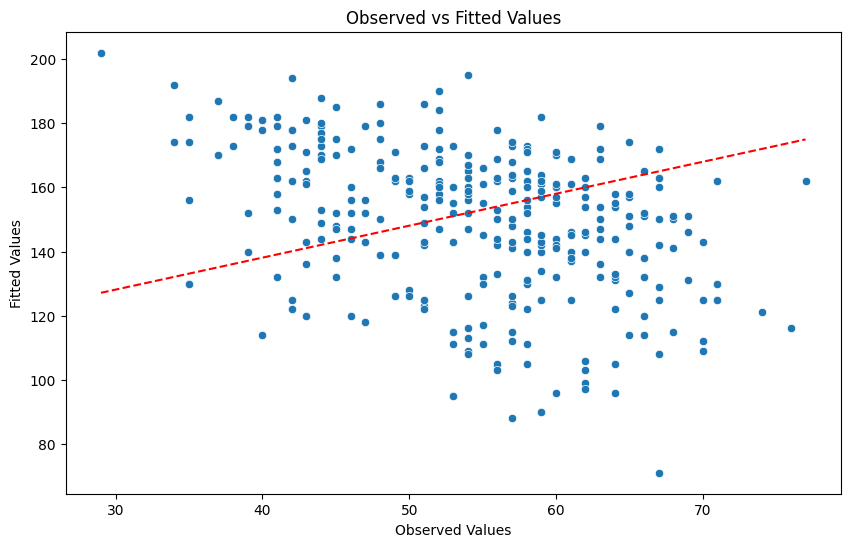

In [13]:
## A significant p-value indicates that the relationship is not linear.
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X, y=y)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(X), max(X)], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

Shapiro-Wilk Test: W=0.9613328576087952, p-value=3.295332078323554e-07


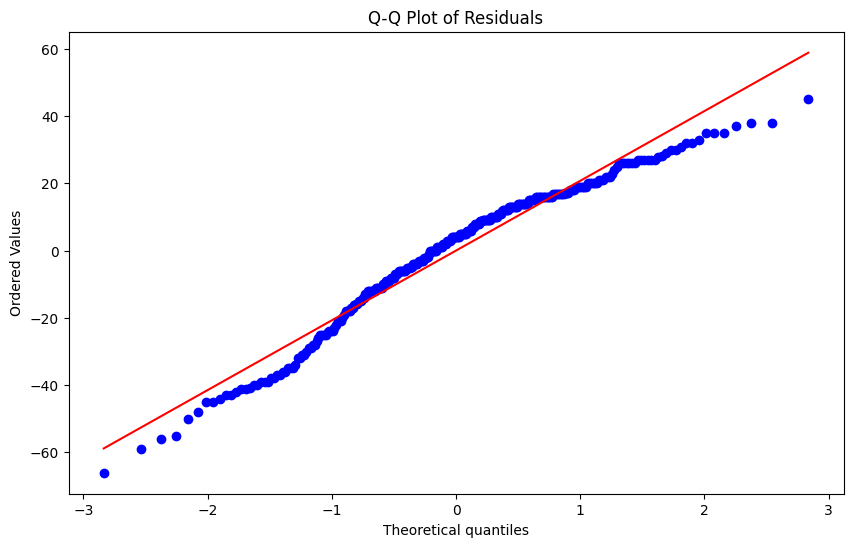

Goldfeld-Quandt Test: F-statistic=1.303913862675679, p-value=0.05286550432673299


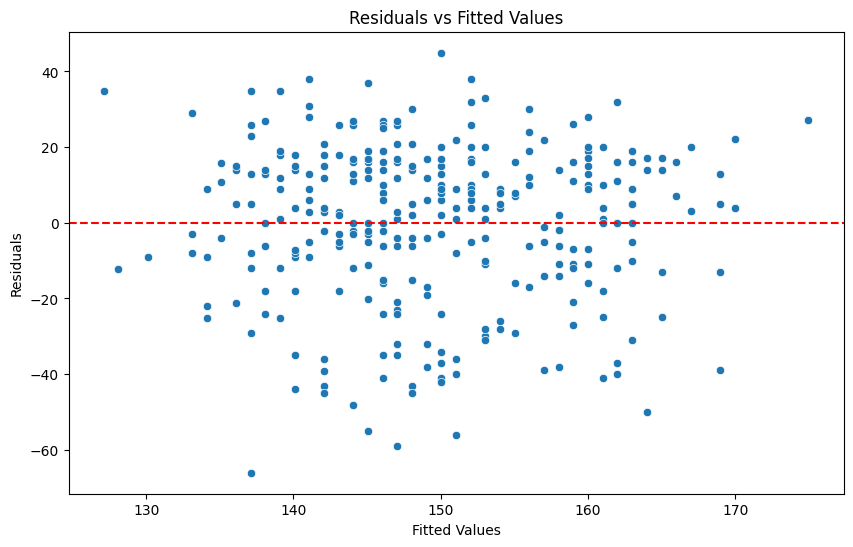

In [14]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

# a significant p-value indicates heteroscedasticity, meaning that the variance of the
# residuals is not constant across different levels of the independent variable(s).

## Goldfeld-Quandt Test: The Goldfeld-Quandt test is another test used to assess homoscedasticity.
## It divides the data into two groups and compares the variance of the residuals in the two groups.

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

**Simple Linear Regression Insights**

**OLS regression results**

Adj R-squared is 0.152, which is a small number. This suggests that age is not a strong predictor of thalach.

P-value that is 0, which is less than 0.05. This suggests that the relationship between age and thalach is statistically significant.

Prob (F-statistic): 1.11e-12
Prob (F-statistic) is small, which indicates that there is statistical significant relationship.


**Rainbow Test**: stat=0.9772151218961352, p-value=0.5563343407176566

p-value of rainbow test is greater than 0.05, which means that the relationship between age and thalach is linear.

**Shapiro-Wilk Test**: W=0.9613328576087952, p-value=3.295332078323554e-07

p-value of shapiro-wilk test is less than 0.05, which indicates that the residuals are not normally distributed.

**Goldfeld-Quandt Test**: F-statistic=1.303913862675679, p-value=0.05286550432673299

Goldfeld-Quant Test is greater than 0.05. This means that the homogeneity of variables are the same across the variables.

**Multiple Linear Regression**

In [15]:
# Fit the regression model
X = df[['age', 'chol', 'trestbps','oldpeak']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df["thalach"]
model = sm.OLS(y, X)
results = model.fit()

                            OLS Regression Results                            
Dep. Variable:                thalach   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     24.09
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           2.78e-17
Time:                        03:41:02   Log-Likelihood:                -1335.4
No. Observations:                 303   AIC:                             2681.
Df Residuals:                     298   BIC:                             2699.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        181.3191     10.601     17.104      0.0

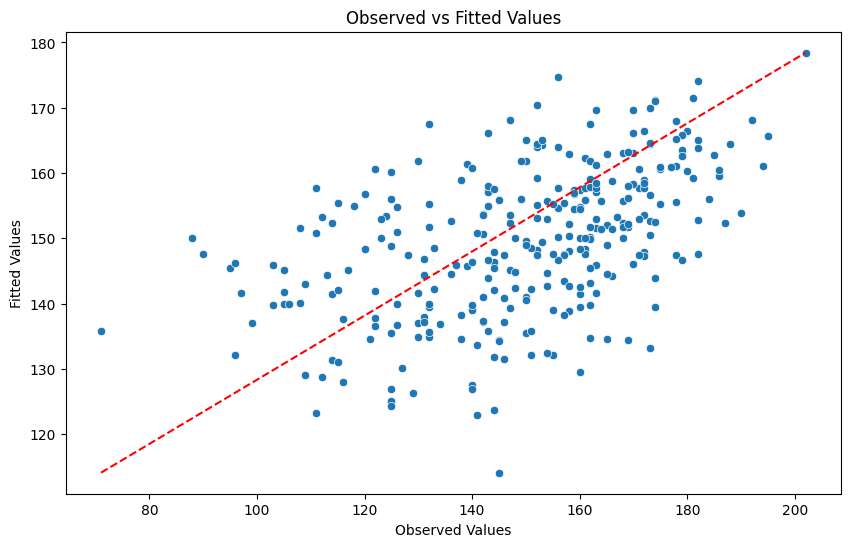

Shapiro-Wilk Test: W=0.9623565673828125, p-value=4.552937298285542e-07


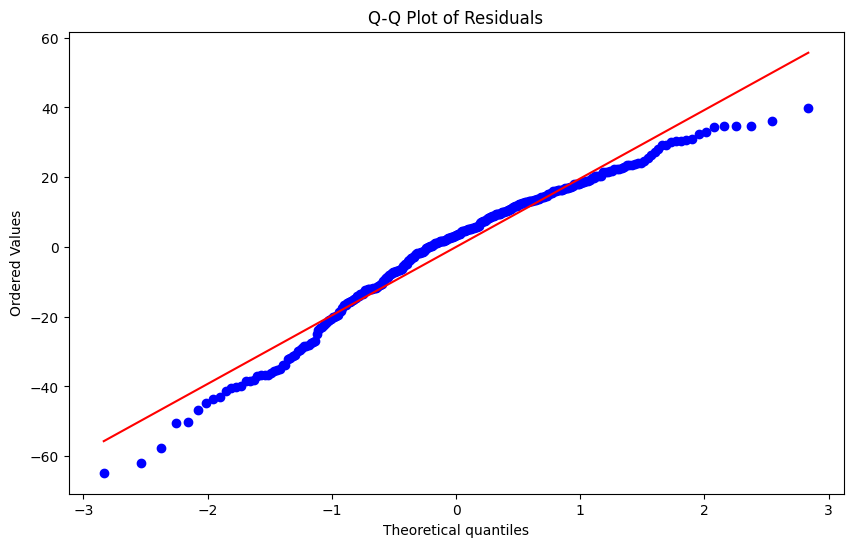

Goldfeld-Quandt Test: F-statistic=1.3254423270108218, p-value=0.044581182460699406


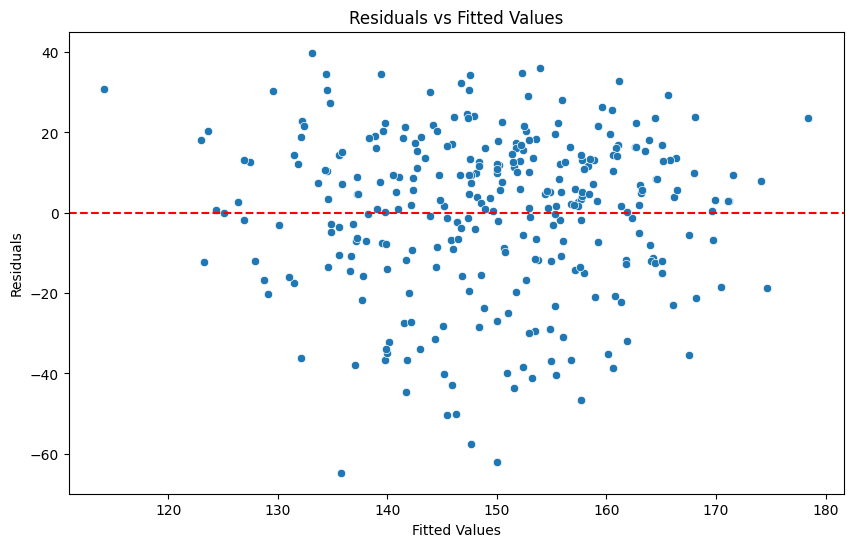

In [16]:
# Fit the regression model
X = df[['age', 'chol', 'trestbps', 'oldpeak']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df["thalach"]
model = sm.OLS(y, X)
results = model.fit()

# Print summary of the regression
print(results.summary())


residuals = results.resid
fitted = results.fittedvalues


##### CHECKING ASSUMPTIONS #####

# Checking multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)

### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

## A significant p-value indicates that the relationship is not linear.
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(y), max(y)], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()




### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()




##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

# a significant p-value indicates heteroscedasticity, meaning that the variance of the
# residuals is not constant across different levels of the independent variable(s).

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


**Multiple Linear Regression Insights**

**OLS regression results**


Adj R-squared is 0.234, which is a small number. This suggests that the independent variables are not a strong predictor of thalach.


P-value for age, trestbps and oldpeak is less than 0.05 and chol is above 0.05  This suggests that the relationship between independent variable and dependent variable is statistically significant.


Prob (F-statistic) is small, which indicates that there is a statistical significant relationship.


**Rainbow Test**: stat=0.9867709703175999, p-value=0.5327684141909239

p-value of rainbow test is greater than 0.05, which means that the relationships are linear.

**Shapiro-Wilk Test**: W=0.9623565673828125, p-value=4.552937298285542e-07

p-value of shapiro-wilk test is less than 0.05, which indicates that the residuals are not normally distributed.

**Goldfeld-Quandt Test**: F-statistic=1.3254423270108218, p-value=0.044581182460699406

Goldfeld-Quant Test is less than 0.05. This means that the homogeneity of variables are not the same across the variables.

**Reason for the chosen dataset**

This dataset was chosen to see the relationship of the variables and how it relates to heart rate.

**Issues encountered**

Connection Error: Error connecting to server.

Could not connect to UCI serve to get dataset.

This issue was resolved by using the following code:

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

Solution was found through searching on Google.